### <div dir="rtl">هدف دفتر جوبيتير هذا هو تمرين شبكة عصبونية عميقة من نوع Convolutional Neural Network على قاعدة MNIST للارقام المكتوبة بخط اليد
 </div>


<div dir="rtl">

الهدف هو ان تصبح الشبكة العصبونية قادرة على التعرف اوتوماتيكيا على الارقام.
<br>
هذا المثال جد مشهور و يستعمل كثيرا كبداية و تدريب في استعمال الشبكات العصبونية.
<br>
في المثال اسفله نحصل على شبكة عصبونية قادرة على توقع الرقم المكتوب اوتوماتيكيا بدقة تفوق 99 في المائة 
<br>
  كتب بواسطة رضوان لكنسات، مستوحى من امثلة Keras  
</div>

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


### <div dir="rtl">:هنا عانوجدو البيانات ديال الارقام المكتوبة باليد اللي عندنا التصنيف ديالها باش نعطيوها للشبكة تتعلم منها
 </div>
 
 <div dir="rtl">60000 مثال ديال التصنيف عانوريوهم للشبكة باش تعلم منهم و عانخليو 10000 ماعانوريوهمش للشبكة باش نجربوها فيهم </div>

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 3s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### <div dir="rtl">الشبكة العصبونية ديالنا اللي عادي نترينيوها باش تولي واعرة فالتعرف على الارقام  
 </div>


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [5]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2624 - acc: 0.9213 - val_loss: 0.0519 - val_acc: 0.9839
Epoch 2/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0919 - acc: 0.9723 - val_loss: 0.0367 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0688 - acc: 0.9787 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0555 - acc: 0.9830 - val_loss: 0.0326 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0459 - acc: 0.9853 - val_loss: 0.0275 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0280 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0355 - acc: 0.9886 - val_loss: 0.0268 - 

### <div dir="rtl">نجربو واش الشبكة ترينات مزيان، عانعطيوها دوك تصاور جداد ماكانوش فهادوك اللي تعلمات منهم  
 </div>

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02680587958545202
Test accuracy: 0.993


داكشي زين، 99.3% كاتعرف تجاوب صحيح

### <div dir="rtl">نضربو طليلة على شي امثلة نشوفو الخوارزمية اش كاتقول  
 </div>

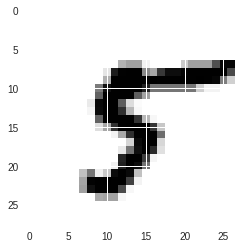

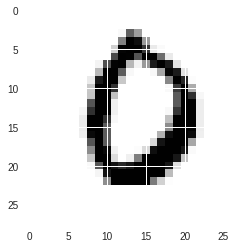

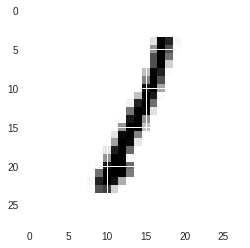

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

randindices=np.random.randint(x_test.shape[0],size=3)
plt.imshow(x_test[randindices[0],:,:,0])
plt.show()
plt.imshow(x_test[randindices[1],:,:,0])
plt.show()
plt.imshow(x_test[randindices[2],:,:,0])

In [9]:
predictions=model.predict(x_test)
print("الخوارزمية كاتظن ان الرقم هو  " + str(np.argmax(predictions[randindices[0],:])) + ' with ' + str(np.max(predictions[randindices[0],:]) * 100) + '% confidence.')
print("الخوارزمية كاتظن ان الرقم هو " + str(np.argmax(predictions[randindices[1],:])) + ' with ' + str(np.max(predictions[randindices[1],:]) * 100) + '% confidence.')
print("الخوارزمية كاتظن ان الرقم هو " + str(np.argmax(predictions[randindices[2],:])) + ' with ' + str(np.max(predictions[randindices[2],:]) * 100) + '% confidence.')

الخوارزمية كاتظن ان الرقم هو  5 with 100.0% confidence.
الخوارزمية كاتظن ان الرقم هو 0 with 100.0% confidence.
الخوارزمية كاتظن ان الرقم هو 1 with 100.0% confidence.
